In [78]:
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import polynomial_kernel
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

1) Construct a train dataset and represent them.

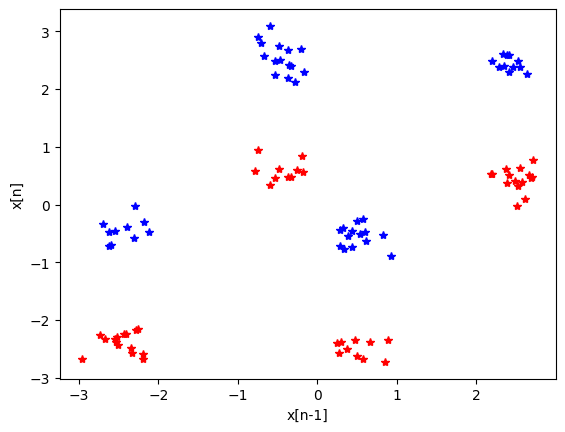

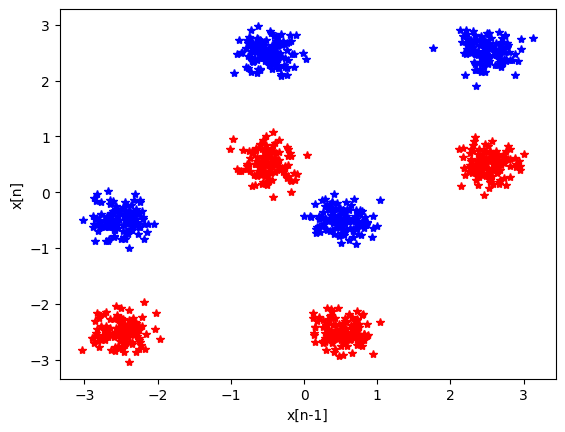

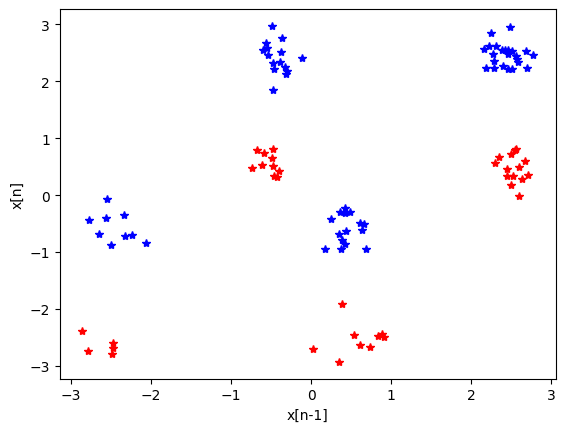

Shape of X_train:  (2, 100)
Shape of y_train:  (100,)


In [76]:
def data(N,a):
   N=N+3
   h=np.array([1,a])
   y=np.sign(np.random.randn(N,1))
   y=np.reshape(y,len(y))
   t=np.arange(N)
   z=np.convolve(h,y)
   z=z[1:N-1]
   y=y[2:N-1]
   X=np.array([z[0:N-3],z[1:N-2]])+0.2*np.random.randn(2,N-3)
   return X,y


data_alpha = 1.5  # Parameter 'a' for data generation
N_train = 100  # Number of training samples
X_train, y_train = data(N_train, data_alpha)

N_Val = 100  # Number of validation samples
X_Val, y_Val = data(N_Val, data_alpha)

N_test = 1000  # Number of test samples
X_test, y_test = data(N_test, data_alpha)



ind1=np.where(y_train==1)
ind2=np.where(y_train==-1)
plt.plot(X_train[0,ind1],X_train[1,ind1],'b*')
plt.plot(X_train[0,ind2],X_train[1,ind2],'r*')
plt.xlabel('x[n-1]')
plt.ylabel('x[n]')
plt.show()

ind1=np.where(y_test==1)
ind2=np.where(y_test==-1)
plt.plot(X_test[0,ind1],X_test[1,ind1],'b*')
plt.plot(X_test[0,ind2],X_test[1,ind2],'r*')
plt.xlabel('x[n-1]')
plt.ylabel('x[n]')
plt.show()

ind1=np.where(y_Val==1)
ind2=np.where(y_Val==-1)
plt.plot(X_Val[0,ind1],X_Val[1,ind1],'b*')
plt.plot(X_Val[0,ind2],X_Val[1,ind2],'r*')
plt.xlabel('x[n-1]')
plt.ylabel('x[n]')
plt.show()

print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)

# Linear Kernel

In [58]:
from sklearn.svm import SVC
from sklearn.metrics.pairwise import chi2_kernel
X = np.array([[0, 1], [1, 0], [.2, .8], [.7, .3]])
y = np.array([0, 1, 0, 1])
K = chi2_kernel(X, gamma=.5)
print(K.shape)
print(X.shape)
print(y.shape)



svm = SVC(kernel='precomputed').fit(K, y)
svm.predict(K)

(4, 4)
(4, 2)
(4,)


array([0, 1, 0, 1])

# Polynomial Order 3 Kernel

# Radial Basis Function Kernel

0.00 % completed
9.38 % completed
14.25 % completed
19.12 % completed
24.00 % completed
33.38 % completed
38.25 % completed
43.12 % completed
48.00 % completed
57.38 % completed
62.25 % completed


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


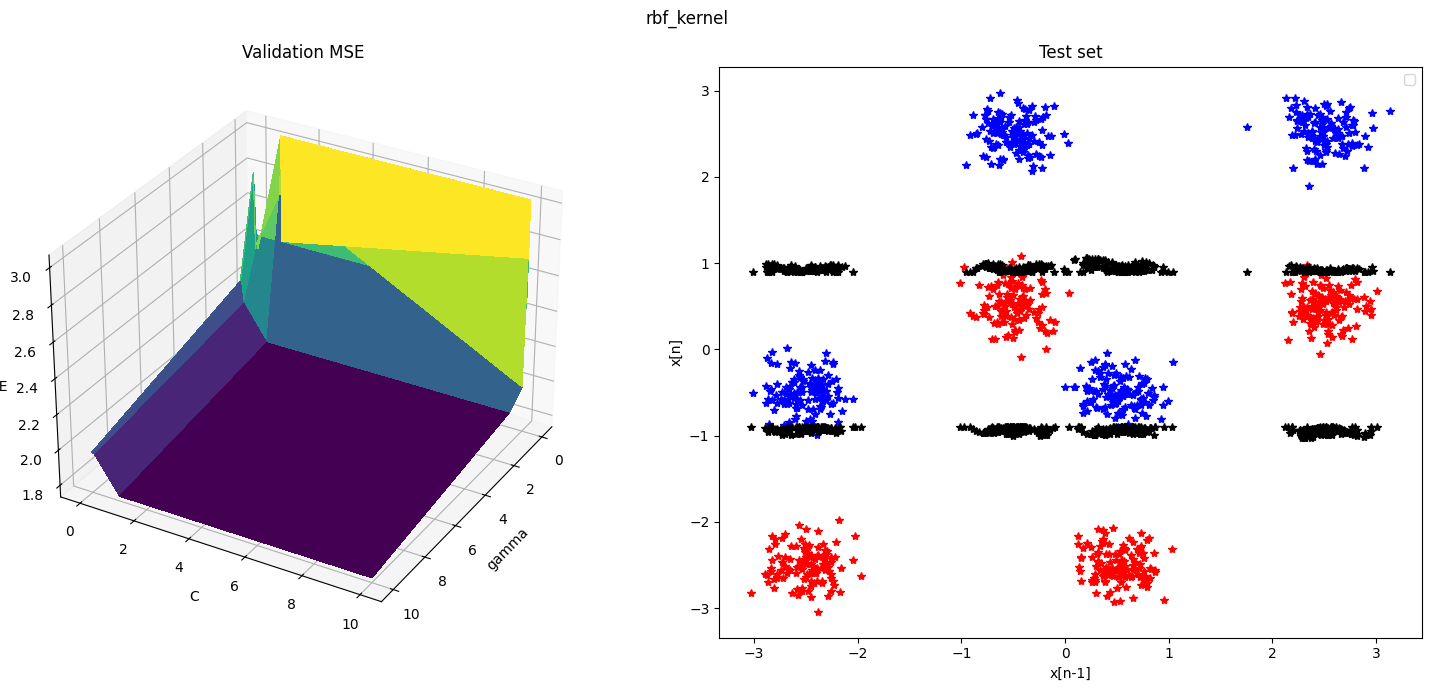

Best gamma:  10.0
Best C:  1.0
Best validation MSE:  1.76
Test MSE:  0.005482027688826701


In [100]:
gamma_high = 1
gamma_low = -6
gamma_values = np.logspace(-6, 1, gamma_high-gamma_low+1, base=10)

C_high = 1
C_low = -6
C_values = np.logspace(-6, 1, C_high-C_low+1, base=10)


mse_values = np.zeros((len(gamma_values), len(C_values)))
total_iterations = len(gamma_values) * len(C_values)

for i, gamma in enumerate(gamma_values):
    for j, c in enumerate(C_values):
        K_train = rbf_kernel(X_train.T, gamma=gamma)
        svm_rbf = SVC(kernel='precomputed', C=c).fit(K_train, y_train)
        
        # Validating the model
        K_val = rbf_kernel(X_Val.T, gamma=gamma)
        Yval_Pred_rbf = svm_rbf.predict(K_val)        
        mse_val_value = mean_squared_error(y_Val, Yval_Pred_rbf)
        mse_values[i, j] = mse_val_value

        if (i * len(C_values) + j) % (total_iterations // 10) == 0:
            print(f"{i * len(C_values) + j / total_iterations * 100:.2f} % completed")

best_gamma_index, best_C_index = np.unravel_index(mse_values.argmin(), mse_values.shape)
best_gamma = gamma_values[best_gamma_index]
best_C = C_values[best_C_index]
best_val_MSE = mse_values[best_gamma_index, best_C_index]

# Training the model with the best hyperparameters on the test set
K_test = rbf_kernel(X_test.T, gamma=best_gamma)
rbf_test = SVC(kernel='precomputed', C=best_C).fit(K_test, y_test)
Ytest_Pred_rbf = rbf_test.predict(K_test)
test_MSE = mean_squared_error(y_test, Ytest_Pred_rbf)

fig = plt.figure(figsize=(15, 7))
plt.suptitle("rbf_kernel")

ax1 = fig.add_subplot(121, projection='3d')
G,C = np.meshgrid(gamma_values, C_values)
surf = ax1.plot_surface(C, G, mse_values, cmap='viridis', linewidth=0, antialiased=False)
ax1.view_init(elev=30, azim=30)
ax1.set_xlabel('gamma')
ax1.set_ylabel('C')
ax1.set_zlabel('MSE')
ax1.set_title("Validation MSE")


# Printing the 2D map of the test set and the decision boundary
ax2 = fig.add_subplot(122)
ind1=np.where(y_test==1)
ind2=np.where(y_test==-1)
ax2.plot(X_test[0,ind1],X_test[1,ind1],'b*')
ax2.plot(X_test[0,ind2],X_test[1,ind2],'r*')
ax2.plot(X_test[0], Ytest_Pred_rbf, 'k*')
ax2.set_xlabel('x[n-1]')
ax2.set_ylabel('x[n]')
ax2.set_title("Test set")
ax2.legend()

plt.tight_layout()
plt.show()

print("Best gamma: ", best_gamma)
print("Best C: ", best_C)
print("Best validation MSE: ", best_val_MSE)
print("Test MSE: ", test_MSE)

In [101]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define your gamma and C values
gamma_high = 1
gamma_low = -6
gamma_values = np.logspace(gamma_low, gamma_high, gamma_high-gamma_low+1, base=10)

C_high = 1
C_low = -6
C_values = np.logspace(C_low, C_high, C_high-C_low+1, base=10)

# Initialize an array to store accuracy values
accuracy_values = np.zeros((len(gamma_values), len(C_values)))

total_iterations = len(gamma_values) * len(C_values)

for i, gamma in enumerate(gamma_values):
    for j, c in enumerate(C_values):
        # Train SVC model
        svm_model = SVC(kernel='rbf', gamma=gamma, C=c)
        svm_model.fit(X_train, y_train)
        
        # Validate the model
        y_val_pred = svm_model.predict(X_Val)
        accuracy = accuracy_score(y_Val, y_val_pred)
        accuracy_values[i, j] = accuracy

        progress = (i * len(C_values) + j) / total_iterations * 100
        print(f"{progress:.2f} % completed")

# Find the indices of the best hyperparameters
best_gamma_index, best_C_index = np.unravel_index(accuracy_values.argmax(), accuracy_values.shape)
best_gamma = gamma_values[best_gamma_index]
best_C = C_values[best_C_index]
best_val_accuracy = accuracy_values[best_gamma_index, best_C_index]

print("Best gamma: ", best_gamma)
print("Best C: ", best_C)
print("Best validation accuracy: ", best_val_accuracy)


ValueError: Found input variables with inconsistent numbers of samples: [2, 100]